In [1]:
#Installing ppscore Library Using pip

In [2]:
!pip install ppscore

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest

In [4]:
# -----------------------------
# 1. Load and Explore Dataset
# -----------------------------

In [5]:
# Load dataset
df= pd.read_csv(r"C:\Users\GURU\Downloads\EDA2\EDA2\adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
print("Initial Dataset Info:")
df.info()

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# Check for missing values
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# Drop rows with missing values
df.dropna(inplace = True)

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [12]:
# -----------------------------
# 2. Scaling
# -----------------------------

In [13]:
num_cols = ['age','fnlwgt','education_num','capital_gain','capital_loss', 'hours_per_week']

In [14]:
# Standard Scaling
standard_scaler = StandardScaler()
df_scaler = df.copy()
df_scaler[num_cols] = standard_scaler.fit_transform(df_scaler[num_cols])

In [15]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = minmax_scaler.fit_transform(df_minmax[num_cols])

In [16]:
# -----------------------------
# 3. Encoding
# -----------------------------

In [17]:
df_encoded = df.copy()

In [18]:
# One-Hot Encoding for < 5 categories
df_encoded = pd.get_dummies(df_encoded, columns = ['race', 'sex'] , drop_first = True)

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [20]:
# Label Encoding for > 5 categories
label_cols = ['workclass','education', 'marital_status','occupation', 'relationship','native_country']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [21]:
# -----------------------------
# 4. Feature Engineering
# -----------------------------

In [22]:
# Feature 1: Capital Change
df_encoded['capital_change'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

In [23]:
# Feature 2: Work Type based on hours/week
df_encoded['work_type'] = df_encoded['hours_per_week'].apply(lambda x: 'Full_Time' if x >= 35 else 'Part-Time')
df_encoded = pd.get_dummies(df_encoded, columns = ['work_type'], drop_first = True)

In [24]:
# Log Transformation on Skewed Feature
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

In [25]:
# -----------------------------
# 5. Feature Selection
# -----------------------------

In [26]:
# Isolation Forest to remove outliers
iso = IsolationForest(contamination = 0.01, random_state = 42)
outliers = iso.fit_predict(df_encoded[num_cols])
df_cleaned = df_encoded[outliers == 1]
iso

IsolationForest(contamination=0.01, random_state=42)

In [27]:
# PPS Matrix
pps_matrix = pps.matrix(df_cleaned)[['x','y','ppscore']]
print("\n Top Predictive Power Scores :")
print(pps_matrix.sort_values(by='ppscore', ascending = False).head())


 Top Predictive Power Scores :
                x              y  ppscore
0             age            age      1.0
22      workclass      workclass      1.0
66      education      education      1.0
67      education  education_num      1.0
87  education_num      education      1.0


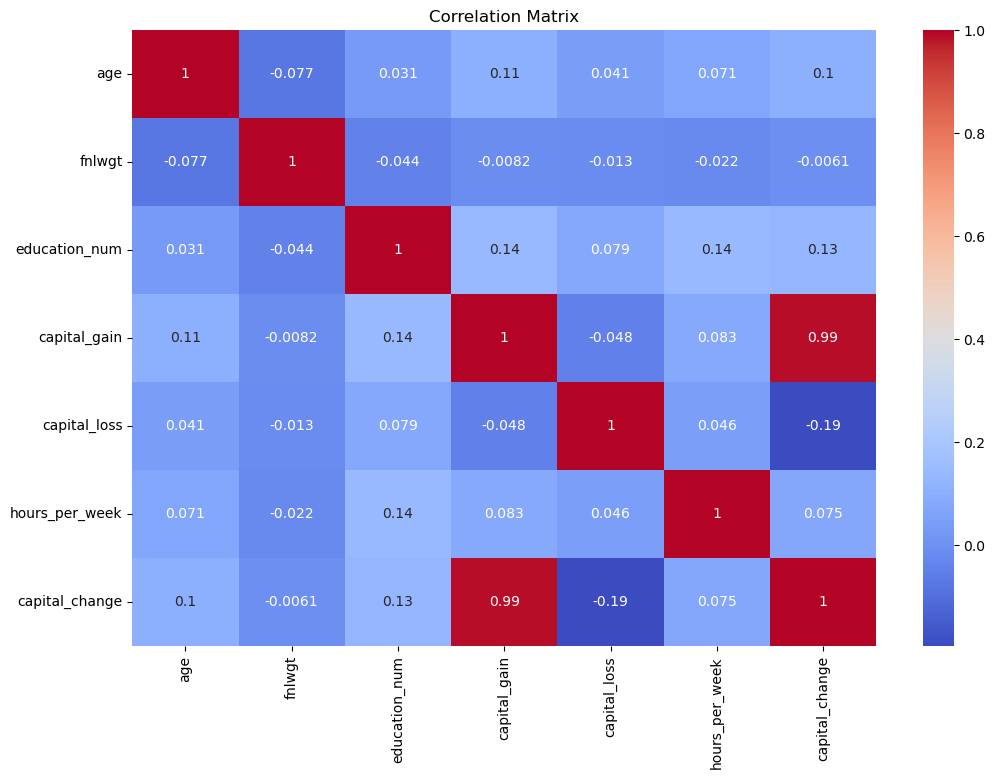

In [28]:
# Correlation Matrix
plt.figure(figsize = (12, 8))
sns.heatmap(df_cleaned[num_cols + ['capital_change']].corr(), annot = True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [29]:
print("\nFinal Preprocessed Dataset shape :", df_cleaned.shape)


Final Preprocessed Dataset shape : (32235, 21)
